Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

In [44]:
import pandas as pd

df = pd.read_csv('task 2.csv')
print(df.head())
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
print(df.info())

print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [5]:
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [42]:
df['Age'].fillna(df['Age'].median(), inplace=True)

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

df.drop(columns=['Cabin'], inplace=True)
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


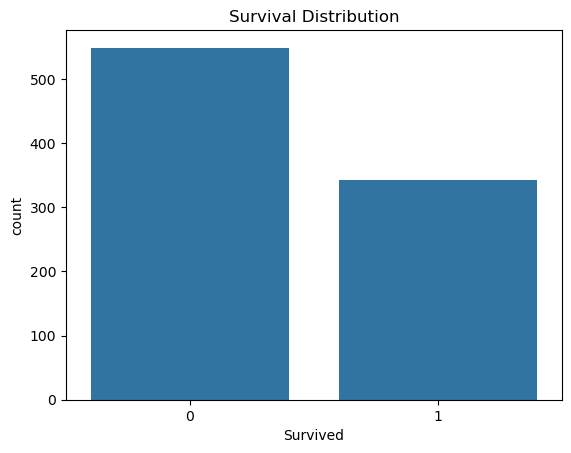

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data=df, x='Survived')
plt.title('Survival Distribution')
plt.show()



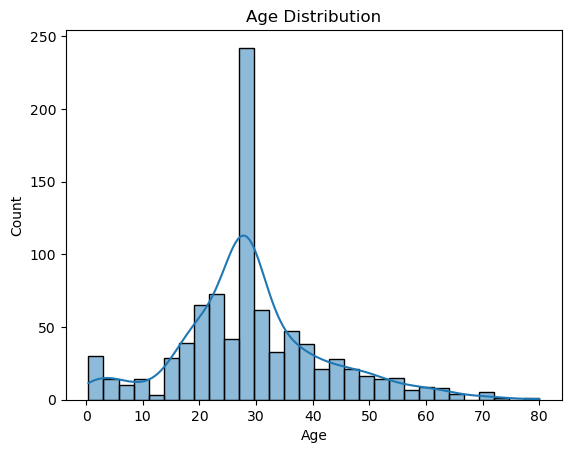

In [13]:
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title('Age Distribution')
plt.show()


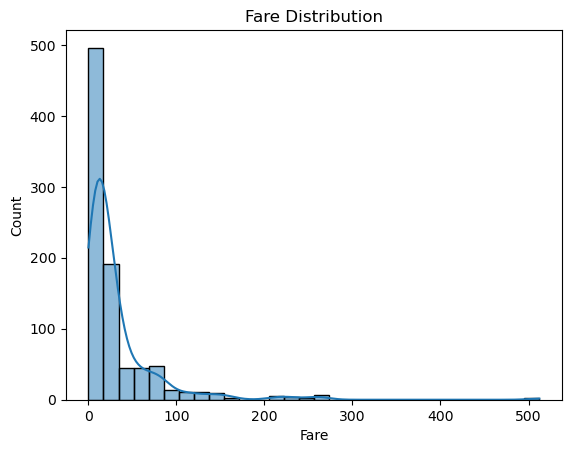

In [15]:
sns.histplot(data=df, x='Fare', bins=30, kde=True)
plt.title('Fare Distribution')
plt.show()

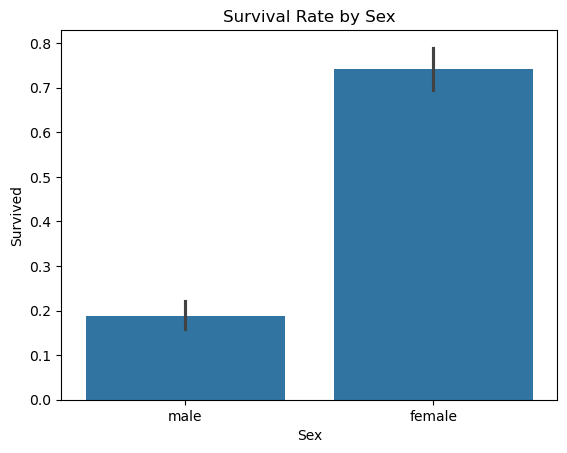

In [17]:
sns.barplot(data=df, x='Sex', y='Survived')
plt.title('Survival Rate by Sex')
plt.show()



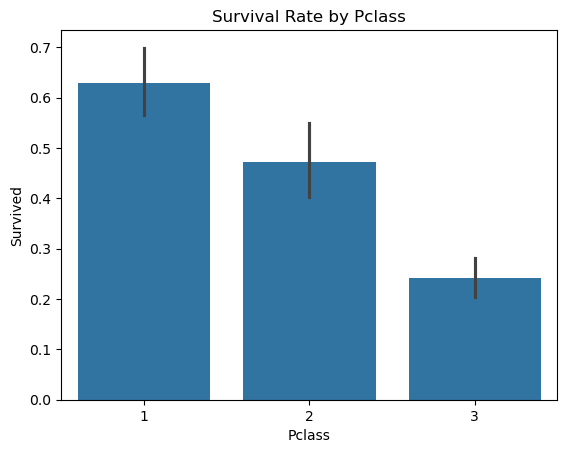

In [19]:
sns.barplot(data=df, x='Pclass', y='Survived')
plt.title('Survival Rate by Pclass')
plt.show()

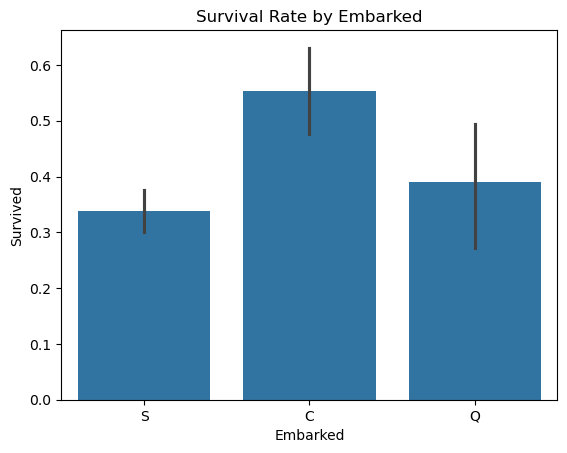

In [21]:
sns.barplot(data=df, x='Embarked', y='Survived')
plt.title('Survival Rate by Embarked')
plt.show()


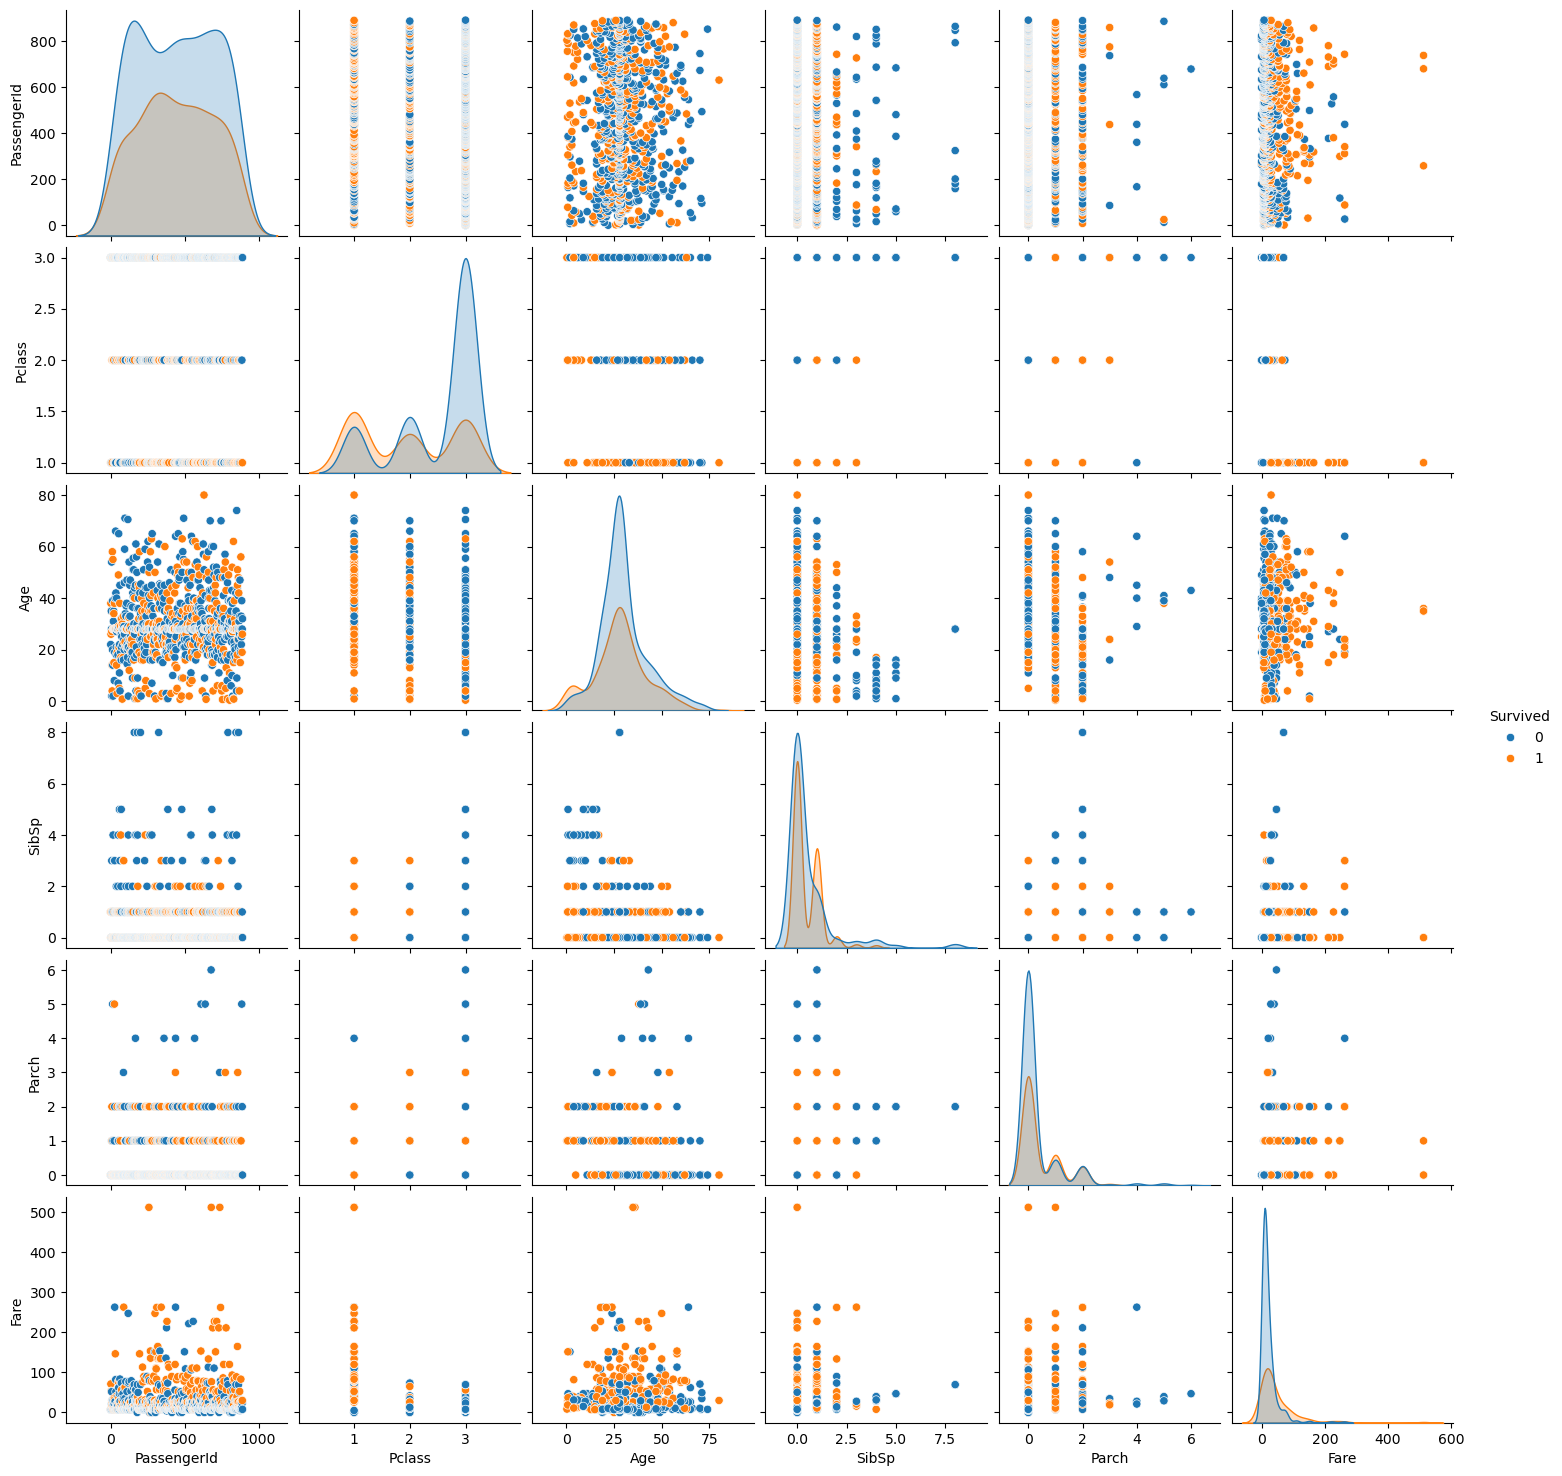

In [23]:
sns.pairplot(df, hue='Survived', diag_kind='kde')
plt.show()


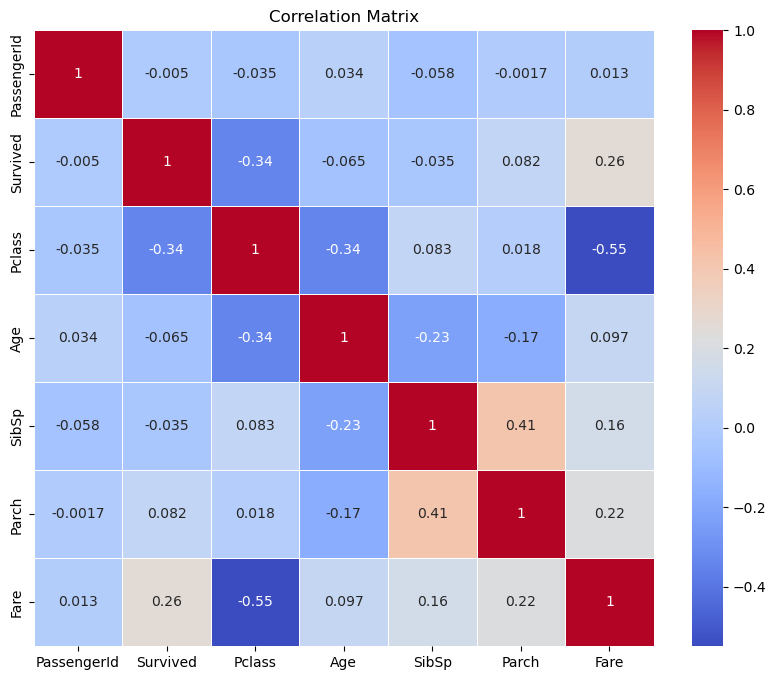

In [27]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


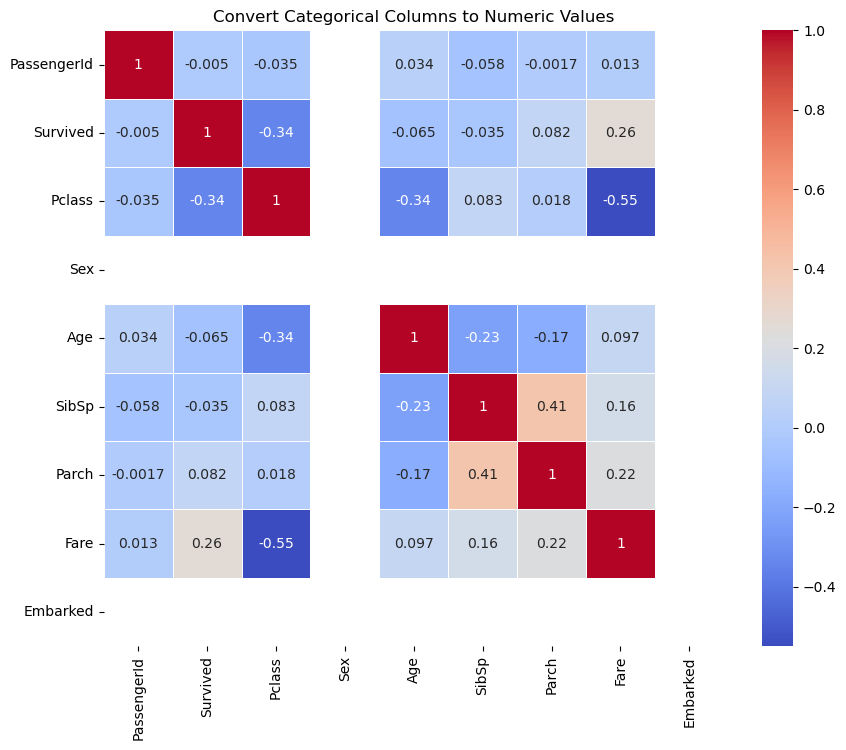

In [36]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

numeric_df = df.select_dtypes(include=['float64', 'int64', 'int32'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Convert Categorical Columns to Numeric Values')
plt.show()
